# 지도학습 분류 미리보기

## 학습 목표
- 이진분류와 다중분류의 개념 이해
- K-최근접 이웃(KNN) 알고리즘의 작동 원리 파악
- 데이터 전처리와 정규화의 중요성 학습
- 머신러닝 모델의 기본 파이프라인 이해

In [2]:
# 필요한 라이브러리 import
import numpy as np        
import pandas as pd        
import matplotlib.pyplot as plt  

In [3]:
# 한글 폰트 설정 (matplotlib에서 한글이 깨지지 않도록)
import matplotlib.font_manager as fm  # 폰트 관리 모듈
import matplotlib

# Windows 시스템의 한글 폰트 경로 설정
font_path = 'C:\\Windows\\Fonts\\H2HDRM.TTF'  # 한글 폰트 파일 경로
font = fm.FontProperties(fname=font_path).get_name()  # 폰트 이름 추출
matplotlib.rc('font', family=font)  # matplotlib 기본 폰트를 한글 폰트로 설정

### 생선 이진분류 - 도미(bream) or 빙어(smelt)

**이진분류란?**
- 두 개의 클래스 중 하나를 선택하는 분류 문제
- 0과 1로 구분하여 표현
- 도미인가? (1), 도미가 아닌가? (0)

**데이터 설명:**
- **특성(Feature)**: 길이(length), 무게(weight) - 2차원 입력 데이터
- **라벨(Label)**: 도미(1) 또는 빙어(0) - 정답 데이터
- **목표**: 새로운 생선의 길이와 무게를 보고 도미인지 빙어인지 예측

In [4]:
# 도미 데이터 준비
# 도미의 길이 데이터 (cm 단위) - 35개의 샘플
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]

# 도미의 무게 데이터 (g 단위) - 35개의 샘플
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# 데이터 개수 확인 (길이와 무게 데이터의 개수가 일치하는지 확인)
len(bream_length), len(bream_weight)  # (35, 35) - 35개의 도미 데이터

(35, 35)

In [5]:

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]


smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


len(smelt_length), len(smelt_weight)  # (14, 14) - 14개의 빙어 데이터

(14, 14)

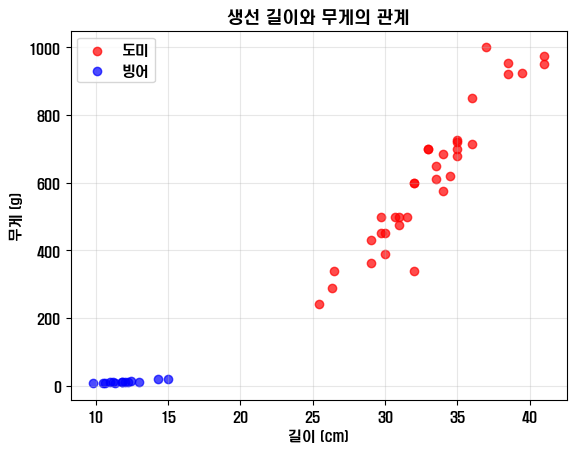

In [6]:
plt.scatter(bream_length, bream_weight, label='도미', color='red', alpha=0.7)  # 도미 데이터 (빨간색)
plt.scatter(smelt_length, smelt_weight, label='빙어', color='blue', alpha=0.7)  # 빙어 데이터 (파란색)
plt.xlabel('길이 (cm)')  # x축 라벨
plt.ylabel('무게 (g)')   # y축 라벨
plt.title('생선 길이와 무게의 관계')  # 그래프 제목
plt.legend()  # 범례 표시
plt.grid(True, alpha=0.3)  # 격자 표시
plt.show()


##### 데이터 전처리 (Data Preprocessing)

**머신러닝 모델이 원하는 형태로 데이터를 가공하는 과정**

**입력 데이터 (특성, Feature):**
- 형태: [길이, 무게] 2차원 배열 (샘플 수 × 특성 수)
- 예시: [[25.4, 242.0], [26.3, 290.0], ...]

**출력 데이터 (라벨, Label):**
- 형태: 도미 or 빙어 → 1, 0으로 구성된 1차원 배열
- 예시: [1, 1, 1, ..., 0, 0, 0, ...] (도미=1, 빙어=0)

**전처리의 중요성:**
- 머신러닝 알고리즘은 숫자 데이터만 처리 가능
- 일관된 데이터 형태로 변환 필요
- 데이터 품질 향상으로 모델 성능 개선

In [7]:
fish_length = bream_length + smelt_length  # 도미 길이 + 빙어 길이 = 전체 길이 데이터
fish_weight = bream_weight + smelt_weight  # 도미 무게 + 빙어 무게 = 전체 무게 데이터
len(fish_length), len(fish_weight)  # (49, 49) - 총 49개의 생선 데이터


(49, 49)

In [8]:

train_input = []  # 빈 리스트 초기화
for l, w in zip(fish_length, fish_weight):  
    train_input.append([l, w]) 
    
train_input

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [9]:

train_label = [1] * len(bream_length) + [0] * len(smelt_length)  # 도미=1, 빙어=0

train_label

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

##### 🤖 K-최근접 이웃 분류 모델 (K-Nearest Neighbors Classifier)

**KNN 알고리즘의 작동 원리:**
1. 새로운 데이터 포인트가 주어지면
2. 기존 훈련 데이터 중에서 가장 가까운 k개의 이웃을 찾음
3. 이웃들의 클래스를 확인하여 다수결로 예측
4. 거리 측정: 유클리드 거리 사용

**장점:**
- 간단하고 직관적인 알고리즘
- 훈련 과정이 빠름 (데이터를 단순히 저장)
- 비선형 패턴도 잘 처리

**단점:**
- 예측 시 모든 훈련 데이터와의 거리 계산 필요
- 메모리 사용량이 많음
- 차원의 저주 문제

In [10]:
# K-최근접 이웃 분류기 import
from sklearn.neighbors import KNeighborsClassifier  # scikit-learn의 KNN 분류기 클래스

In [11]:
kn = KNeighborsClassifier()

kn.fit(train_input, train_label)    
kn.score(train_input, train_label)   
kn.predict([[30, 500], [10, 5]])

array([1, 0])

- distances : 모델 데이터포인트와의 거리 (유클리드 거리 측정 방식)
- index : 모델 데이터포인트의 인덱스

In [12]:

distances, index = kn.kneighbors([[30, 500]])  
print("거리:", distances)
print("인덱스:", index) 

print("이웃 데이터:", np.array(train_input)[index])
print("이웃 라벨:", np.array(train_label)[index]) 

거리: [[ 0.3         0.7         1.          1.5        25.01999201]]
인덱스: [[ 6  9 11 12 10]]
이웃 데이터: [[[ 29.7 500. ]
  [ 30.7 500. ]
  [ 31.  500. ]
  [ 31.5 500. ]
  [ 31.  475. ]]]
이웃 라벨: [[1 1 1 1 1]]


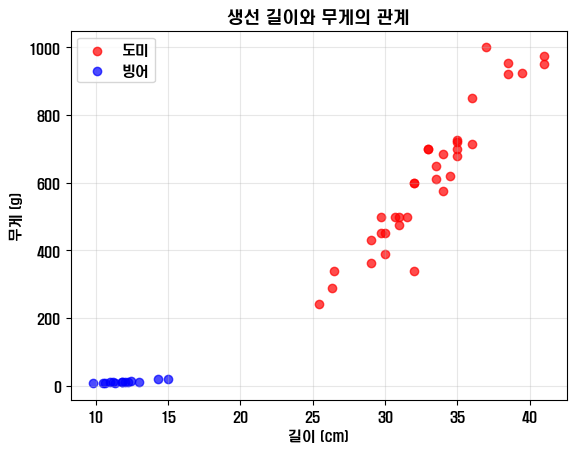

In [13]:

plt.scatter(bream_length, bream_weight, label='도미', color='red', alpha=0.7)  
plt.scatter(smelt_length, smelt_weight, label='빙어', color='blue', alpha=0.7)  
plt.xlabel('길이 (cm)') 
plt.ylabel('무게 (g)')   
plt.title('생선 길이와 무게의 관계') 
plt.legend() 
plt.grid(True, alpha=0.3)  

훈련 데이터 형태: (49, 2)
이웃 인덱스: [[ 6  9 11 12 10]]


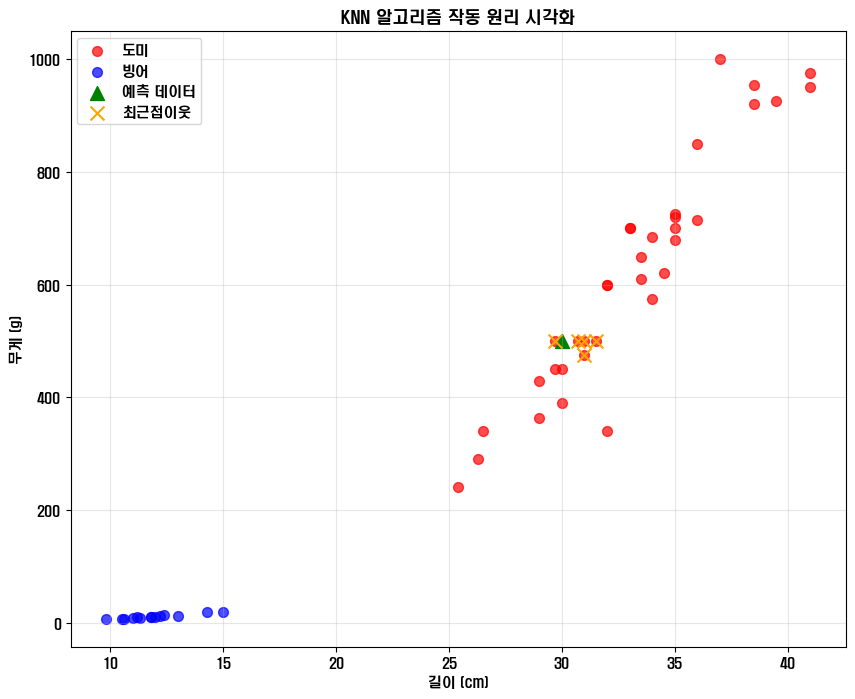

In [14]:
train_input = np.array(train_input)
print("훈련 데이터 형태:", train_input.shape)
print("이웃 인덱스:", index)

plt.figure(figsize=(10, 8))
plt.scatter(bream_length, bream_weight, label='도미', color='red', alpha=0.7, s=50)  # 도미 데이터
plt.scatter(smelt_length, smelt_weight, label='빙어', color='blue', alpha=0.7, s=50)  # 빙어 데이터
plt.scatter(30, 500, label='예측 데이터', marker='^', color='green', s=100)  # 예측할 데이터
plt.scatter(train_input[index, 0], train_input[index, 1], label='최근접이웃', marker='x', color='orange', s=100)  # 최근접 이웃들
plt.xlabel('길이 (cm)')
plt.ylabel('무게 (g)')
plt.title('KNN 알고리즘 작동 원리 시각화')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

##### 훈련데이터-테스트(평가)데이터 분리

In [15]:
fish_input = []
for l, w in zip(fish_length, fish_weight):
    fish_input.append([l, w])

fish_label = [1] * len(bream_length) + [0] * len(smelt_length)

In [16]:
# sampling 편향 : 데이터가 한쪽으로 치우친 현상
# train 데이터는 전부 다 도미, test 데이터는 전부 다 빙어
train_input = fish_input[:35]
train_label = fish_label[:35]    # 1

test_input = fish_input[35:]
test_label = fish_label[35:]     # 0

kn = KNeighborsClassifier()
kn.fit(train_input, train_label)
kn.score(test_input, test_label)

0.0

In [17]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_label, test_label = \
train_test_split(fish_input, fish_label, test_size=0.3, stratify=fish_label, random_state=42)

train_input, test_input, train_label, test_label
sum(train_label), sum(test_label)

(24, 11)

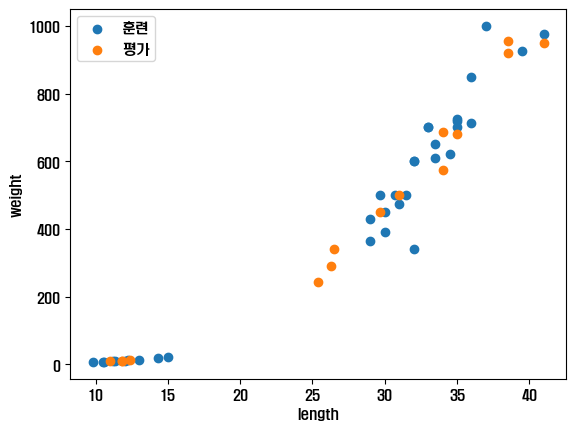

In [18]:
train_input = np.array(train_input)
test_input = np.array(test_input)

# 데이터 분포 확인 (산점도)
plt.scatter(train_input[:, 0], train_input[:, 1], label='훈련')
plt.scatter(test_input[:, 0], test_input[:, 1], label='평가')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [19]:
kn.fit(train_input, train_label)
kn.score(test_input, test_label)

1.0

##### 정규화
- 데이터포인트의 값의 범위를 재정의하는 것
    - StandardScaler
    - MinMaxScaler

In [20]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_label)
kn.score(test_input, test_label)

predict_input = [25, 150]
kn.predict([predict_input])

array([0])

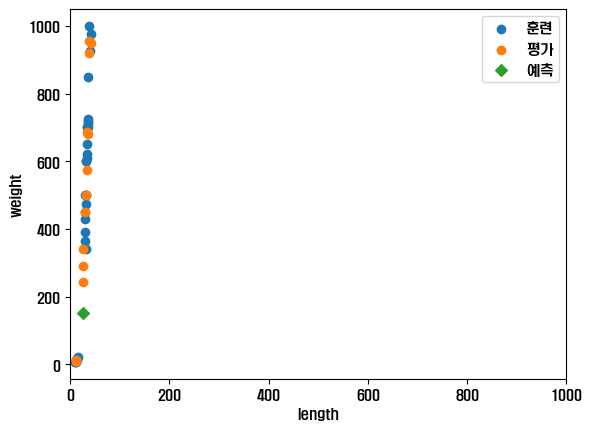

In [21]:
# 데이터 분포 확인 (산점도)
plt.scatter(train_input[:, 0], train_input[:, 1], label='훈련')
plt.scatter(test_input[:, 0], test_input[:, 1], label='평가')
plt.scatter(predict_input[0], predict_input[1], label='예측', marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.xlim((0, 1000))
plt.legend()
plt.show()

In [22]:
distances, index = kn.kneighbors([predict_input])
np.array(train_label)[index]

array([[0, 0, 0, 0, 0]])

##### 표준 점수 (Z-Score)
- 평균에서 얼마나 떨어져 있는지를 표준편차 단위로 계산한 값
$$
    표준 점수 = \frac{데이터포인트 - 평균}{표준편차}
$$

In [23]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
mean, std

(array([ 27.02352941, 445.60294118]), array([ 10.0816099 , 319.21122132]))

In [24]:
train_scaled = (train_input - mean) / std
train_scaled

array([[-1.4703534 , -1.35773091],
       [ 0.49361864,  0.48368306],
       [ 0.74159491,  0.54633749],
       [ 0.36467098,  0.17041086],
       [ 0.49361864,  0.48368306],
       [ 0.79119016,  0.85960969],
       [-1.55962486, -1.36869543],
       [ 0.89038067,  0.84081336],
       [ 0.19604712, -0.04887968],
       [-1.56954391, -1.36524944],
       [ 0.26548048,  0.17041086],
       [-1.4901915 , -1.36524944],
       [ 0.39442813,  0.09209281],
       [ 0.98957118,  1.73677184],
       [ 0.19604712, -0.25877205],
       [ 0.59280915,  0.79695525],
       [-1.26205334, -1.33423549],
       [ 0.44402339,  0.17041086],
       [ 1.23754745,  1.50181769],
       [-1.70841062, -1.37496088],
       [ 0.89038067,  1.26686354],
       [-1.63897726, -1.3724547 ],
       [ 0.6424044 ,  0.51501027],
       [-1.62905821, -1.37402106],
       [ 0.79119016,  0.79695525],
       [ 0.79119016,  0.8752733 ],
       [-1.391001  , -1.35773091],
       [ 0.29523763,  0.01377476],
       [ 0.59280915,

In [25]:
test_scaled = (test_input - mean) / std
test_scaled

array([[-1.58938201, -1.36556271],
       [-1.51002961, -1.36493617],
       [ 1.13835694,  1.59579935],
       [ 0.79119016,  0.73430081],
       [ 0.69199966,  0.40536501],
       [-1.4505153 , -1.35397164],
       [-0.07176725, -0.48746075],
       [ 1.38633321,  1.58013574],
       [-0.16103871, -0.6378314 ],
       [ 0.69199966,  0.74996442],
       [ 0.39442813,  0.17041086],
       [ 1.13835694,  1.48615408],
       [ 0.26548048,  0.01377476],
       [-1.51002961, -1.3646229 ],
       [-0.05192915, -0.33082465]])

In [26]:
kn.fit(train_scaled, train_label)
kn.score(test_scaled, test_label)

1.0

In [27]:
predict_scaled = (predict_input - mean) / std
predict_scaled

array([-0.20071491, -0.92604182])

In [28]:
kn.predict([predict_input])

array([1])

c:\ProgramData\miniforge3\envs\helloworld\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) HYHeadLine-Medium.
  fig.canvas.print_figure(bytes_io, **kw)


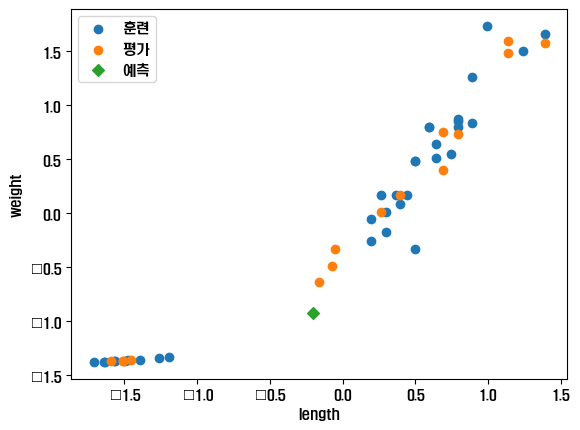

In [29]:
# 데이터 분포 확인 (산점도)
plt.scatter(train_scaled[:, 0], train_scaled[:, 1], label='훈련')
plt.scatter(test_scaled[:, 0], test_scaled[:, 1], label='평가')
plt.scatter(predict_scaled[0], predict_scaled[1], label='예측', marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

**StandardScaler란?** 
- **StandardScaler**는 데이터의 각 특성(feature)을 평균이 0, 표준편차가 1이 되도록 변환(표준화, Standardization)하는 전처리 도구입니다.
- 데이터의 분포를 표준정규분포(평균 0, 표준편차 1)로 맞춰줌으로써, <br>
     모든 특성이 동일한 스케일을 가지게 합니다.



### 2. 표준화(standardization) 공식

$$
z = \frac{x - \mu}{\sigma}
$$

- $x$ : 원래 데이터 값
- $\mu$ : 특성(feature)의 평균
- $\sigma$ : 특성(feature)의 표준편차

---

### 3. 효과

- 표준화를 거치면, 특성의 단위와 값의 크기가 달라도 <br>
동일한 기준에서 모델을 학습시킬 수 있어 알고리즘의 성능이 좋아질 수 있습니다.

In [30]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
train_scaled = std_scaler.fit_transform(train_input)
train_scaled

array([[-1.4703534 , -1.35773091],
       [ 0.49361864,  0.48368306],
       [ 0.74159491,  0.54633749],
       [ 0.36467098,  0.17041086],
       [ 0.49361864,  0.48368306],
       [ 0.79119016,  0.85960969],
       [-1.55962486, -1.36869543],
       [ 0.89038067,  0.84081336],
       [ 0.19604712, -0.04887968],
       [-1.56954391, -1.36524944],
       [ 0.26548048,  0.17041086],
       [-1.4901915 , -1.36524944],
       [ 0.39442813,  0.09209281],
       [ 0.98957118,  1.73677184],
       [ 0.19604712, -0.25877205],
       [ 0.59280915,  0.79695525],
       [-1.26205334, -1.33423549],
       [ 0.44402339,  0.17041086],
       [ 1.23754745,  1.50181769],
       [-1.70841062, -1.37496088],
       [ 0.89038067,  1.26686354],
       [-1.63897726, -1.3724547 ],
       [ 0.6424044 ,  0.51501027],
       [-1.62905821, -1.37402106],
       [ 0.79119016,  0.79695525],
       [ 0.79119016,  0.8752733 ],
       [-1.391001  , -1.35773091],
       [ 0.29523763,  0.01377476],
       [ 0.59280915,

---

### 다중분류
**다중분류(Multi-class Classification) 는** 
- 입력 데이터가 여러 개의 클래스(범주) 중 하나의 클래스에 속하도록 예측하는 문제
<br>

> 💡 즉, “A냐 B냐”처럼 2가지가 아닌
> - “A, B, C, … 중 하나”를 예측하는 문제입니다.

In [31]:
df = pd.read_csv('./data/fish.csv')
df

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [32]:
df['Species'].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [33]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [34]:
# df[df['Weight'] == 0].index    # Weight가 0인 생선 = 40번 index
df = df.drop(40).reset_index(drop=True)
df.describe()

,Weight,Length,Diagonal,Height,Width
count,158.000000,158.000000,158.000000,158.000000,158.000000
mean,400.847468,28.465823,31.280380,8.986790,4.424232
std,357.697796,10.731707,11.627605,4.295191,1.689010
min,5.900000,8.400000,8.800000,1.728400,1.047600
25%,121.250000,21.000000,23.200000,5.940600,3.398650
50%,281.500000,27.400000,29.700000,7.789000,4.277050
75%,650.000000,35.750000,39.675000,12.371850,5.586750
max,1650.000000,63.400000,68.000000,18.957000,8.142000


##### 데이터 전처리
- 훈련 데이터의 규격 : input + label (numpy ndarray)
- 훈련 데이터/테스트(평가) 데이터 분리
- 정규화 (컬럼값 사이의 차이를 완화)

In [ ]:
# 입력 데이터 : 생선의 5가지 특성(무게, 길이, 대각선, 높이, 너비)
fish_input = df[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

# 라벨 데이터 : 생선 종류
fish_label = df['Species'].to_numpy()

fish_input.shape, fish_label.shape

((158, 5), (158,))

In [ ]:
# 테스트 데이터, 학습용 데이터 분리
train_input, test_input, train_label, test_label = \
    train_test_split(fish_input, fish_label, test_size=.10, random_state=0)

train_input.shape, test_input.shape, train_label.shape, test_label.shape

((142, 5), (16, 5), (142,), (16,))

In [ ]:
# 정규화
# 각 특성의 값 범위가 다르므로 동일한 스케일로 맞추기
standard_scaler= StandardScaler()
  

In [ ]:
# 정규화 시킬 평균이랑 표준편차 계산
standard_scaler.fit(train_input)  

# 학습시킬데이터 정규화
train_scaled = standard_scaler.transform(train_input)    

# 테스트용데이터 정규화
test_scaled = standard_scaler.transform(test_input)    

##### 훈련

In [ ]:
kn = KNeighborsClassifier(n_neighbors=7)
kn.fit(train_scaled, train_label)

,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
# 훈련된 모델이 기억하고 있는 데이터
kn._fit_X

array([[-2.36306956e-01,  6.76343006e-01,  7.08519057e-01,
        -6.71430898e-01,  2.30468738e-02],
       [-5.88599673e-01, -2.83008776e-01, -3.74726203e-01,
        -5.56040991e-01, -3.95072820e-01],
       [ 3.43340885e+00,  3.07472246e+00,  2.92785081e+00,
         1.68844327e-01,  1.07273073e+00],
       [-2.18692320e-01,  4.79675891e-03,  3.96929443e-03,
        -1.96877826e-02,  2.00340601e-01],
       [-7.06030578e-01, -5.22846721e-01, -5.06829283e-01,
        -5.30696954e-01, -6.08934870e-01],
       [ 1.74533958e+00,  1.25195407e+00,  1.33380697e+00,
         2.24118377e+00,  1.43262745e+00],
       [ 1.81873389e+00,  1.15601890e+00,  1.12244204e+00,
         8.00495699e-01,  1.30001508e+00],
       [ 2.04058940e-01,  1.96667115e-01,  3.82664792e-01,
         1.17914249e+00,  2.97100501e-01],
       [-7.94103758e-01, -6.85936524e-01, -6.74159852e-01,
        -6.18380440e-01, -5.66759007e-01],
       [-8.88048482e-01, -8.77806880e-01, -8.41490420e-01,
        -7.54183192e-01

In [ ]:
# 종에 대한 정보
kn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

##### 평가

In [41]:
kn.score(test_scaled, test_label)

0.875

##### 다중분류 작동 방식
- 다중분류 클래스 값의 크기와 같은 배열 형태로 결과를 도출

In [48]:
# 예측 Prediction
kn.predict(test_scaled[0:5])

array(['Bream', 'Roach', 'Perch', 'Perch', 'Parkki'], dtype=object)

In [49]:
print(kn.classes_)

#predict_proba : 각각의 종에 대한 확률
kn.predict_proba(test_scaled[0:5])

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.42857143, 0.        , 0.57142857,
        0.        , 0.        ],
       [0.        , 0.        , 0.85714286, 0.        , 0.        ,
        0.        , 0.14285714],
       [0.        , 0.        , 0.85714286, 0.        , 0.        ,
        0.        , 0.14285714],
       [0.        , 0.71428571, 0.        , 0.        , 0.28571429,
        0.        , 0.        ]])

In [50]:
distance, index = kn.kneighbors(test_scaled[7:8])
distance, index

(array([[0.91101148, 1.22823945, 1.54569749, 1.58666383, 1.59724465,
         1.68338757, 1.72850434]]),
 array([[115, 131,  73,  50,  77,  84,   6]]))

In [45]:
train_label[index]

array([['Pike', 'Pike', 'Perch', 'Perch', 'Pike', 'Perch', 'Whitefish']],
      dtype=object)